In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [36]:
def plot_images(images, labels):
    plt.figure(figsize=(10,10))
    for i, img in enumerate(images):
        plt.subplot(int(f'33{i+1}'))
        plt.title(str(labels[i]))
        plt.imshow(img, cmap='gray')

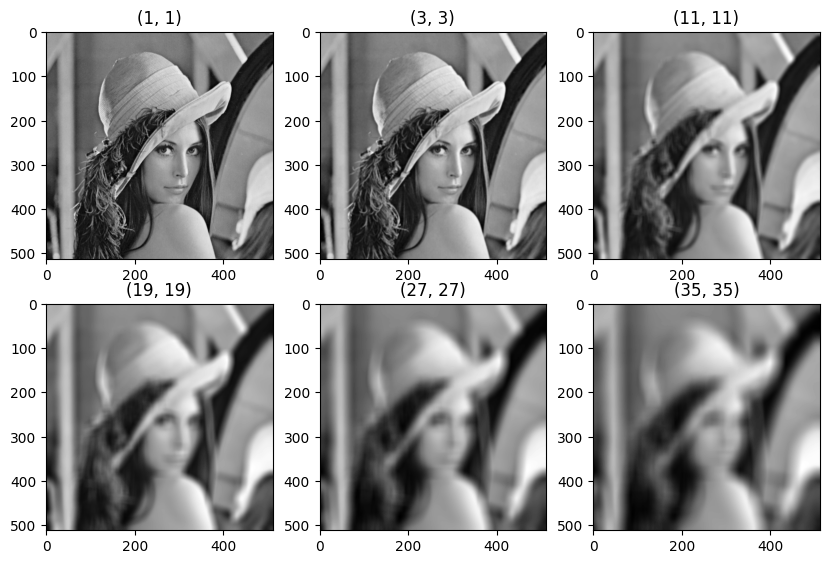

In [37]:
lenna = cv2.imread("../data/images/lenna.png", flags=cv2.IMREAD_GRAYSCALE)

k_sizes = [(i, i) for i in range(3, 36, 8)]
b_lenna = [cv2.blur(lenna, ksize=k) for k in k_sizes]

b_lenna = [lenna, *b_lenna]
k_sizes = [(1, 1), *k_sizes]
labels = [str(k) for k in k_sizes]

plot_images(b_lenna, labels)

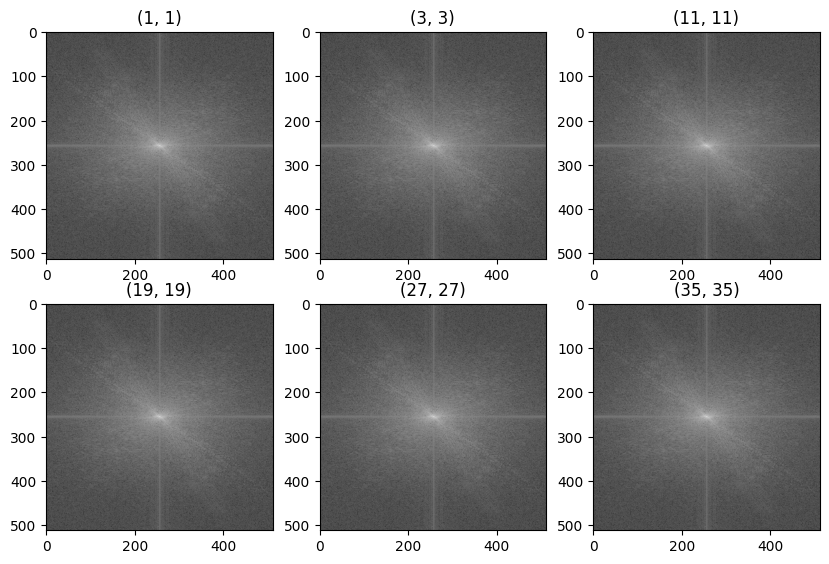

In [38]:
dft = np.fft.fft2

def G_shift(img):
    return np.fft.fftshift(dft(img))

def mag(img, scale=20):
    d = dft(lenna)
    d = np.fft.fftshift(d)
    return scale * np.log(np.abs(d)) 

mags = [mag(img) for img in b_lenna]
G_shifted = [G_shift(img) for img in b_lenna]

plot_images(mags, labels)

In [39]:
(h, w) = lenna.shape
(cX, cY) = (int(w / 2.0), int(h / 2.0))
size = 60

In [40]:
import copy

G0 = copy.copy(G_shifted[0])
G0[cY - size:cY + size, cX - size:cX + size] = 0

# plt.imshow(mod_m0, cmap='gray')

In [41]:
G0 = np.fft.ifftshift(G0)
recon = np.real(np.fft.ifft2(G0))
# recon
# plt.imshow(recon)
recon.shape

(512, 512)

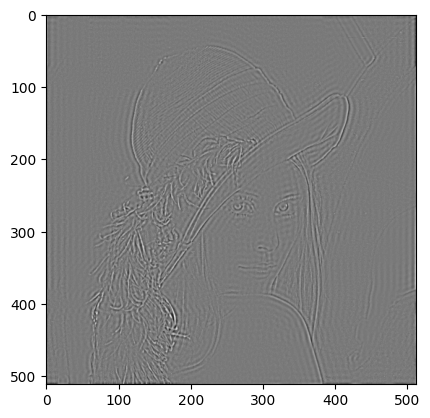

In [43]:
plt.imshow(recon, cmap='gray')